In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

%matplotlib inline

from datetime import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
page = requests.get("https://www.worldometers.info/world-population/population-by-country/")
soup = BeautifulSoup(page.content, 'html.parser')
html_table = soup.find('table')
all_rows = html_table.find_all('tr')
final_data_list = []

for pos, rows in enumerate(all_rows):
    col_list=[each_col.get_text(strip=True) for each_col in rows.find_all('td')]
    final_data_list.append(col_list)

countries = pd.DataFrame(final_data_list).dropna().iloc[:,1:2]
population = pd.DataFrame(final_data_list).dropna().iloc[:,2:3]

country_population = []

In [3]:
pd_raw = pd.read_csv(r'C:\Users\pc\Desktop\vaccinations.csv')
df_plot = pd.DataFrame(pd_raw, columns=['location', 'date', 'people_vaccinated']).dropna()

locations = df_plot['location'].values.tolist()
dates = df_plot['date'].values.tolist()
vaccinations = df_plot['people_vaccinated'].values.tolist()

country_list = ['France', 'United Kingdom', 'Germany',]

for country in country_list:
    for index in range(len(countries)):
        if country == countries.iat[index,0]:
            country_population.append(population.iat[index,0].replace(',', ''))
            
country1 = []
country2 = []
country3 = []


df = pd.DataFrame()

for x in range(len(locations)):
    if locations[x] == country_list[0]:
        country1.append([dates[x], vaccinations[x]/(np.int64(country_population[0]))])
        
for x in range(len(locations)):
    if locations[x] == country_list[1]:
        country2.append([dates[x], vaccinations[x]/(np.int64(country_population[1]))])
        
for x in range(len(locations)):
    if locations[x] == country_list[2]:
        country3.append([dates[x], vaccinations[x]/(np.int64(country_population[2]))])

df1 = pd.DataFrame(country1, columns=["date", country_list[0]])
df2 = pd.DataFrame(country2, columns=["date", country_list[1]])
df3 = pd.DataFrame(country3, columns=["date", country_list[2]])

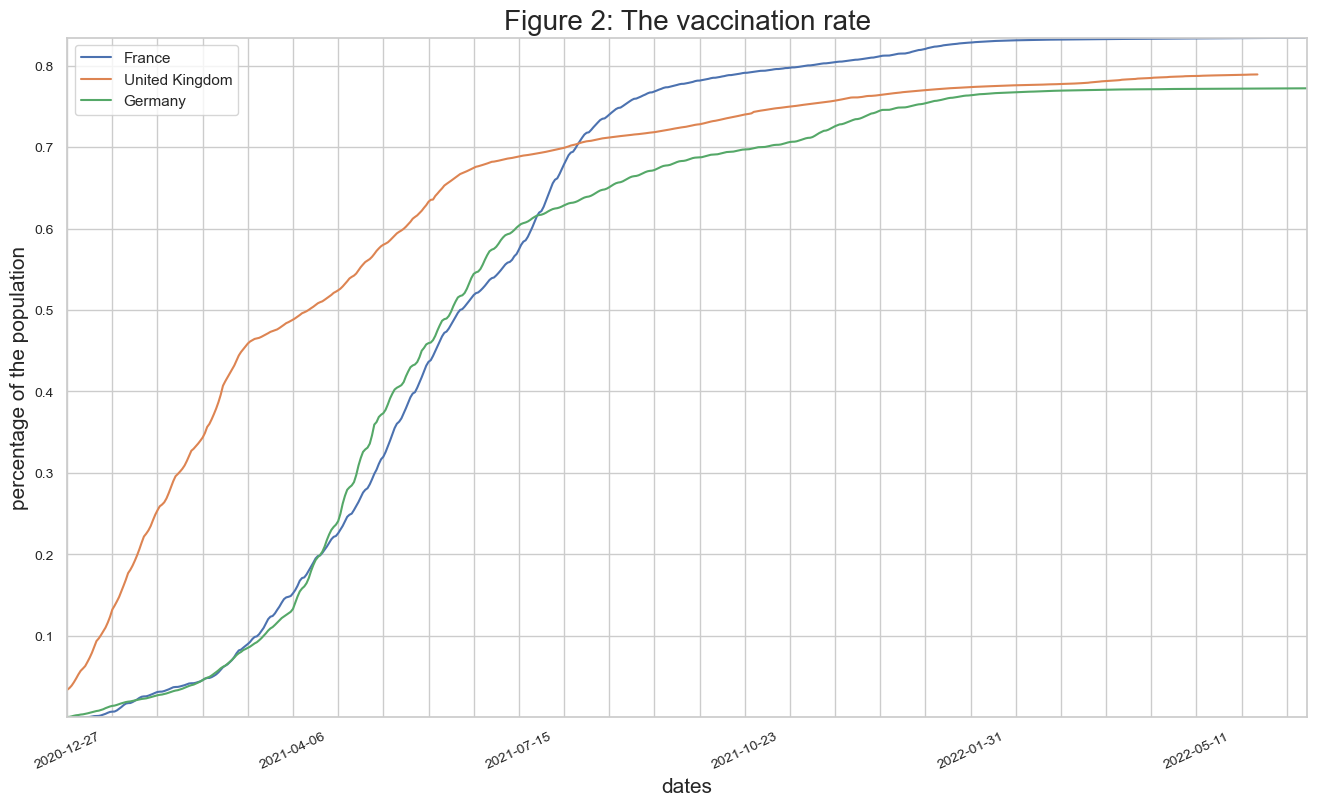

In [4]:
mpl.rcParams['figure.figsize'] = [16, 9]
mpl.rcParams['figure.dpi'] = 100
sns.set(style = 'whitegrid')

ax = df1.plot()
df2.plot(ax=ax)
df3.set_index('date').plot(ax=ax)

plt.rcParams['axes.xmargin'] = 0
plt.xticks(np.arange(0, len(df1), 20), fontsize = 10, rotation = 25)
plt.yticks(fontsize = 10)
plt.xlabel('dates', fontsize = 15)
plt.ylabel('percentage of the population', fontsize = 15)
plt.title('Figure 2: The vaccination rate', fontsize = 20)
plt.margins(0)